In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In /data/s2965003/.conda/envs/py38/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /data/s2965003/.conda/envs/py38/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /data/s2965003/.conda/envs/py38/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /data/s2965003/.conda/envs/py38/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /data/s2965003/.conda

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate,Precision,Recall
import disarray

In [3]:
import torch
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="4,5,6,7"

In [4]:
bs = 32
path = Path('/data/s2965003/gtzan_data/images_original')
data = ImageDataBunch.from_folder(path, train="/data/s2965003/gtzan_data/images_original", valid_pct=0.2, size=256, num_workers=4).normalize(imagenet_stats)

In [5]:
data.classes

['blues',
 'classical',
 'country',
 'disco',
 'hiphop',
 'jazz',
 'metal',
 'pop',
 'reggae',
 'rock']

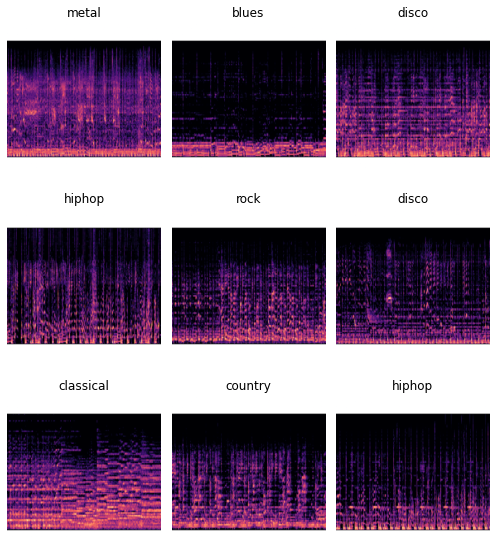

In [6]:
data.show_batch(rows=3, figsize=(7,8))

## With ResNet34

In [14]:
learn = create_cnn(data, models.resnet34, metrics=[error_rate,Precision(),Recall()])
#learn.model = torch.nn.DataParallel(learn.model, device_ids=[4,5])
#learn.model.to(f'cuda:{learn.model.device_ids[0]}')

/data/s2965003/.conda/envs/py38/lib/python3.8/site-packages/fastai/vision/learner.py:109: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


In [15]:
??create_cnn

In [16]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,precision,recall,time
0,3.278717,1.830365,0.613065,nan,0.363543,00:07
1,2.288183,1.320433,0.427136,0.580183,0.561588,00:06
2,1.639152,1.268495,0.351759,0.637382,0.641270,00:06
3,1.225824,1.254663,0.336683,0.659504,0.664082,00:05
4,0.952921,1.243187,0.341709,0.656952,0.658200,00:06


/data/s2965003/.conda/envs/py38/lib/python3.8/site-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")


In [17]:
#learn.lr_find()
#learn.recorder.plot()

In [18]:
learn.unfreeze()
learn.fit_one_cycle(25, max_lr=slice(1e-4,1e-2))

epoch,train_loss,valid_loss,error_rate,precision,recall,time
0,0.516422,1.312620,0.346734,0.634134,0.657499,00:07
1,0.450370,1.240712,0.366834,0.636336,0.619428,00:06
2,0.462653,2.632174,0.417085,0.558783,0.598678,00:06
3,0.589261,2.915261,0.462312,0.483853,0.510802,00:06
4,0.713787,3.540086,0.502513,0.514076,0.496287,00:06
5,0.676900,2.472847,0.356784,0.726550,0.610015,00:06
6,0.576345,2.606710,0.386935,0.631934,0.609911,00:06
7,0.486309,1.801821,0.346734,0.685670,0.641754,00:06
8,0.433469,4.204397,0.567839,0.679937,0.453125,00:06
9,0.380335,2.529965,0.417085,0.709481,0.597042,00:06


In [19]:
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()
len(data.valid_ds)==len(losses)==len(idxs)

True

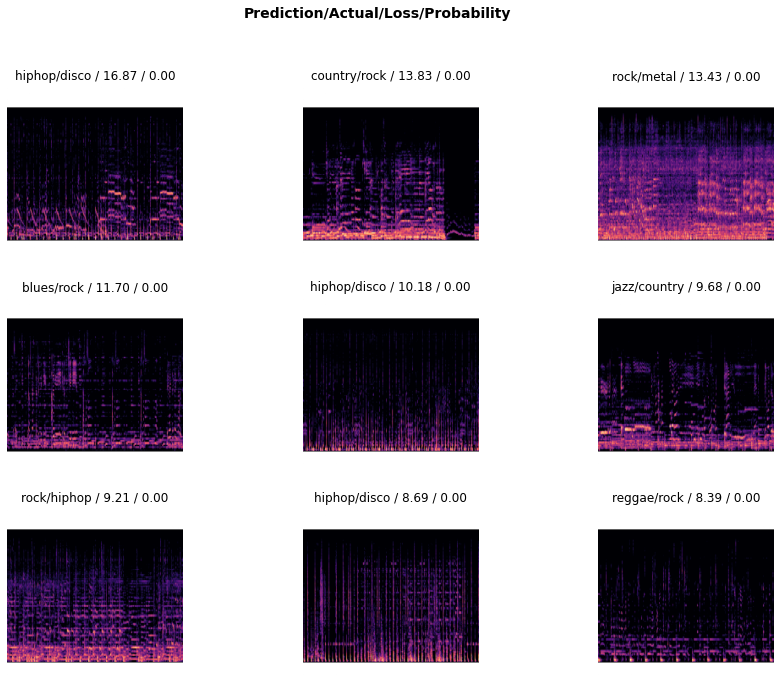

In [20]:
interp.plot_top_losses(9, figsize=(15,11))

,0,1,2,3,4,5,6,7,8,9,micro-average
accuracy,0.964824,0.984925,0.924623,0.919598,0.949749,0.964824,0.984925,0.969849,0.934673,0.849246,0.944724
f1,0.820513,0.943396,0.666667,0.636364,0.666667,0.774194,0.926829,0.800000,0.606061,0.423077,0.723618
false_discovery_rate,0.200000,0.038462,0.250000,0.222222,0.375000,0.076923,0.050000,0.200000,0.375000,0.685714,0.276382
false_negative_rate,0.157895,0.074074,0.400000,0.461538,0.285714,0.333333,0.095238,0.200000,0.411765,0.352941,0.276382
false_positive_rate,0.022222,0.005814,0.028736,0.023121,0.032432,0.005525,0.005618,0.016304,0.032967,0.131868,0.030709
negative_predictive_value,0.983240,0.988439,0.944134,0.933702,0.978142,0.967742,0.988827,0.983696,0.961749,0.963415,0.969291
positive_predictive_value,0.800000,0.961538,0.750000,0.777778,0.625000,0.923077,0.950000,0.800000,0.625000,0.314286,0.723618
precision,0.800000,0.961538,0.750000,0.777778,0.625000,0.923077,0.950000,0.800000,0.625000,0.314286,0.723618
recall,0.842105,0.925926,0.600000,0.538462,0.714286,0.666667,0.904762,0.800000,0.588235,0.647059,0.723618
sensitivity,0.842105,0.925926,0.600000,0.538462,0.714286,0.666667,0.904762,0.800000,0.588235,0.647059,0.723618


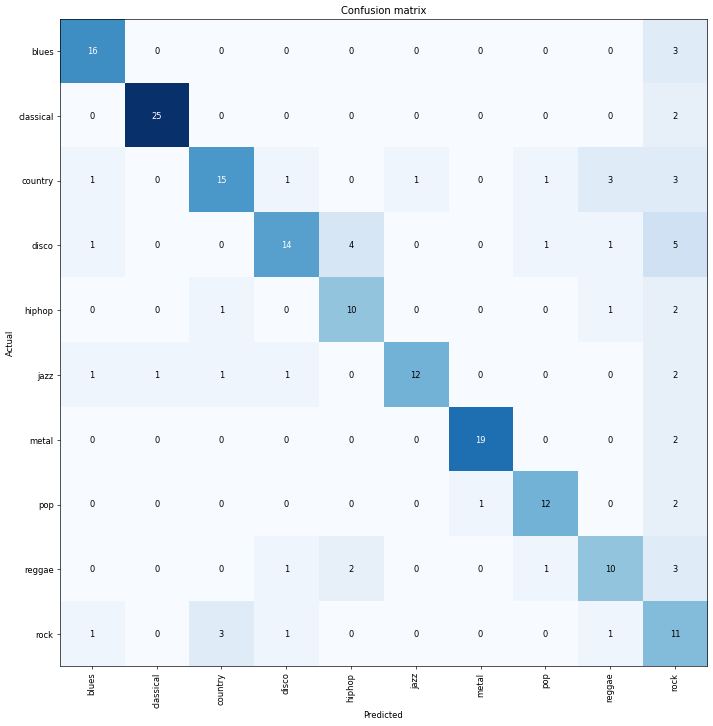

In [21]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)
cm=interp.confusion_matrix()
df = pd.DataFrame(cm)
df.da.export_metrics()

## With ResNet50

In [7]:
learn=None
torch.cuda.empty_cache()
learn = create_cnn(data, models.resnet50, metrics=[error_rate,Precision(),Recall()])

/data/s2965003/.conda/envs/py38/lib/python3.8/site-packages/fastai/vision/learner.py:109: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


In [8]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,precision,recall,time
0,2.661399,2.387275,0.597990,nan,0.405913,00:25
1,1.677022,1.450851,0.422111,0.621579,0.586433,00:08
2,1.154081,1.357053,0.371859,0.622539,0.624665,00:08
3,0.837690,1.357355,0.351759,0.632117,0.643778,00:08
4,0.645114,1.343817,0.366834,0.621496,0.629417,00:08


/data/s2965003/.conda/envs/py38/lib/python3.8/site-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")


In [9]:
#learn.lr_find()
#learn.recorder.plot()

In [10]:
learn.unfreeze()
learn.fit_one_cycle(5, max_lr=slice(1e-4,1e-2))

epoch,train_loss,valid_loss,error_rate,precision,recall,time
0,0.964546,6.565542,0.663317,nan,0.333340,00:12
1,1.259103,9.427836,0.628141,nan,0.368009,00:10
2,1.079620,1.862195,0.371859,0.685121,0.621501,00:10
3,0.817604,1.134099,0.266332,0.755286,0.725507,00:10
4,0.625630,0.953616,0.231156,0.775267,0.763563,00:10


In [11]:
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()
len(data.valid_ds)==len(losses)==len(idxs)

True

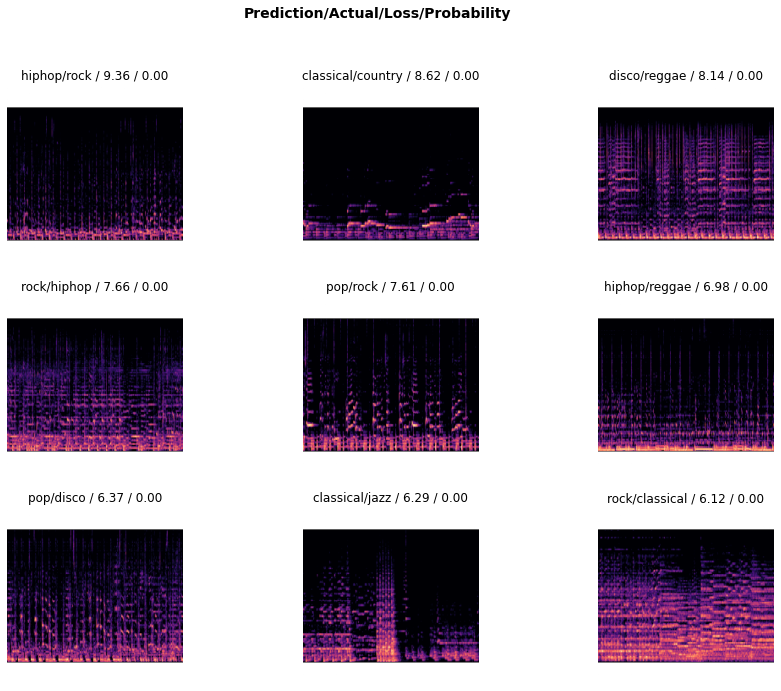

In [12]:
interp.plot_top_losses(9, figsize=(15,11))

,0,1,2,3,4,5,6,7,8,9,micro-average
accuracy,0.969849,0.969849,0.939698,0.924623,0.959799,0.994975,0.984925,0.934673,0.949749,0.909548,0.953769
f1,0.833333,0.812500,0.750000,0.571429,0.809524,0.972973,0.938776,0.734694,0.666667,0.550000,0.768844
false_discovery_rate,0.117647,0.187500,0.333333,0.333333,0.260870,0.000000,0.000000,0.307692,0.230769,0.476190,0.231156
false_negative_rate,0.210526,0.187500,0.142857,0.500000,0.105263,0.052632,0.115385,0.217391,0.411765,0.421053,0.231156
false_positive_rate,0.011111,0.016393,0.050562,0.027933,0.033333,0.000000,0.000000,0.045455,0.016484,0.055556,0.025684
negative_predictive_value,0.978022,0.983607,0.982558,0.945652,0.988636,0.994475,0.982955,0.971098,0.962366,0.955056,0.974316
positive_predictive_value,0.882353,0.812500,0.666667,0.666667,0.739130,1.000000,1.000000,0.692308,0.769231,0.523810,0.768844
precision,0.882353,0.812500,0.666667,0.666667,0.739130,1.000000,1.000000,0.692308,0.769231,0.523810,0.768844
recall,0.789474,0.812500,0.857143,0.500000,0.894737,0.947368,0.884615,0.782609,0.588235,0.578947,0.768844
sensitivity,0.789474,0.812500,0.857143,0.500000,0.894737,0.947368,0.884615,0.782609,0.588235,0.578947,0.768844


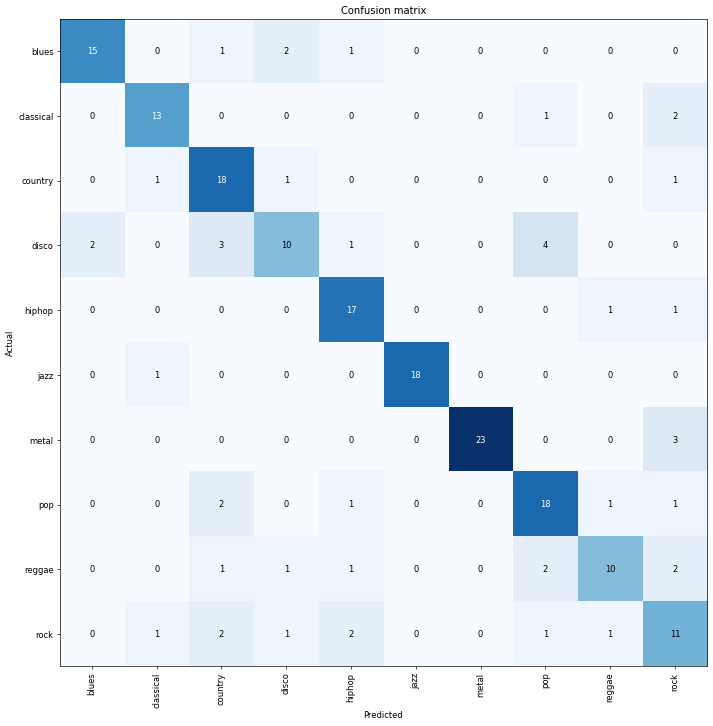

In [13]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)
cm=interp.confusion_matrix()
df = pd.DataFrame(cm)
df.da.export_metrics()

## With SqueezeNet

In [7]:
learn = create_cnn(data, models.squeezenet1_0, metrics=[error_rate,Precision(),Recall()])

/data/s2965003/.conda/envs/py38/lib/python3.8/site-packages/fastai/vision/learner.py:109: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


In [8]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,precision,recall,time
0,2.695641,1.526920,0.507538,0.475578,0.511223,00:27
1,1.961887,1.232001,0.371859,0.638665,0.640375,00:05
2,1.501787,1.187273,0.361809,0.640115,0.644220,00:05
3,1.164482,1.148648,0.326633,0.678136,0.681337,00:05
4,0.936701,1.189294,0.331658,0.673225,0.677337,00:05


/data/s2965003/.conda/envs/py38/lib/python3.8/site-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")


In [9]:
#learn.lr_find()
#learn.recorder.plot()

In [10]:
learn.unfreeze()
learn.fit_one_cycle(25, max_lr=slice(1e-4,1e-2))

epoch,train_loss,valid_loss,error_rate,precision,recall,time
0,0.611938,2.193702,0.391960,0.663098,0.609992,00:06
1,0.569327,1.515103,0.336683,0.684771,0.659753,00:06
2,0.540721,1.651123,0.386935,0.646256,0.615206,00:05
3,0.512473,2.336657,0.386935,0.668805,0.588496,00:05
4,0.493647,4.044066,0.532663,nan,0.478086,00:05
5,0.529475,3.157893,0.527638,nan,0.460689,00:05
6,0.554693,3.924956,0.522613,nan,0.490617,00:05
7,0.654566,5.458950,0.613065,nan,0.393069,00:06
8,0.777926,13.536124,0.678392,nan,0.306834,00:06
9,0.963249,14.692245,0.698492,nan,0.278169,00:05


In [11]:
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()
len(data.valid_ds)==len(losses)==len(idxs)

True

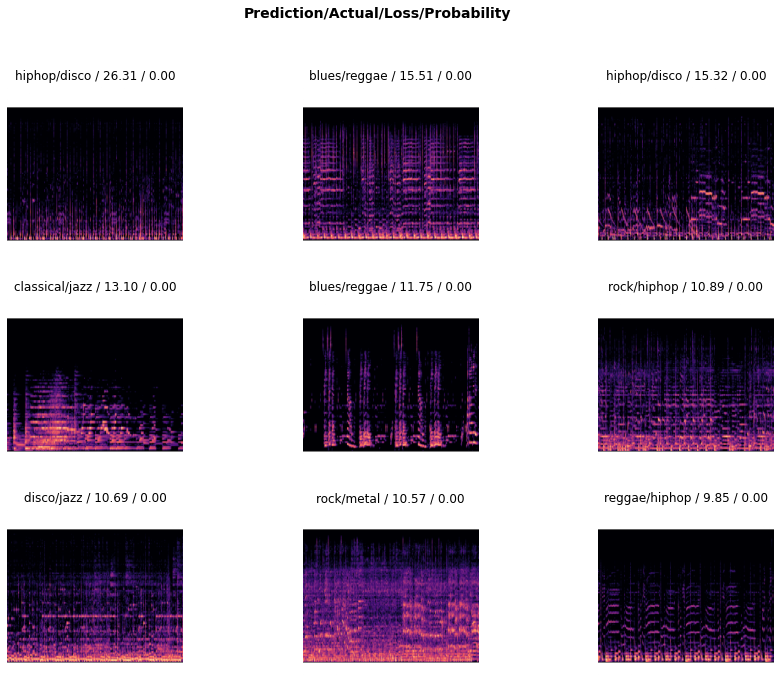

In [12]:
interp.plot_top_losses(9, figsize=(15,11))

,0,1,2,3,4,5,6,7,8,9,micro-average
accuracy,0.959799,0.979899,0.929648,0.909548,0.969849,0.974874,0.974874,0.944724,0.939698,0.894472,0.947739
f1,0.800000,0.928571,0.681818,0.590909,0.785714,0.848485,0.871795,0.702703,0.666667,0.487805,0.738693
false_discovery_rate,0.238095,0.103448,0.210526,0.277778,0.214286,0.066667,0.055556,0.409091,0.368421,0.583333,0.261307
false_negative_rate,0.157895,0.037037,0.400000,0.500000,0.214286,0.222222,0.190476,0.133333,0.294118,0.411765,0.261307
false_positive_rate,0.027778,0.017442,0.022989,0.028902,0.016216,0.005525,0.005618,0.048913,0.038462,0.076923,0.029034
negative_predictive_value,0.983146,0.994118,0.944444,0.928177,0.983784,0.978261,0.977901,0.988701,0.972222,0.960000,0.970966
positive_predictive_value,0.761905,0.896552,0.789474,0.722222,0.785714,0.933333,0.944444,0.590909,0.631579,0.416667,0.738693
precision,0.761905,0.896552,0.789474,0.722222,0.785714,0.933333,0.944444,0.590909,0.631579,0.416667,0.738693
recall,0.842105,0.962963,0.600000,0.500000,0.785714,0.777778,0.809524,0.866667,0.705882,0.588235,0.738693
sensitivity,0.842105,0.962963,0.600000,0.500000,0.785714,0.777778,0.809524,0.866667,0.705882,0.588235,0.738693


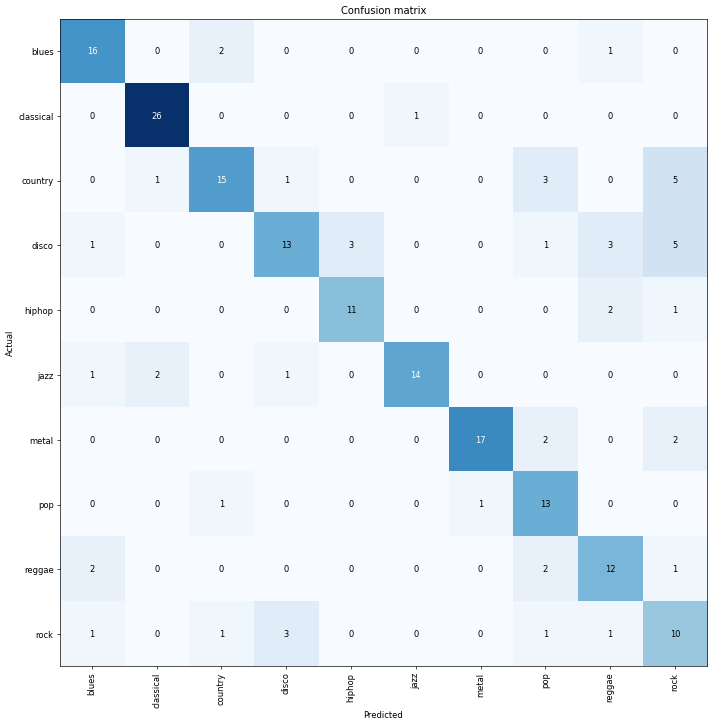

In [13]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)
cm=interp.confusion_matrix()
df = pd.DataFrame(cm)
df.da.export_metrics()